In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Load data

In [155]:
stickers = pd.read_csv('data/train.csv')

In [156]:
stickers['date'] = pd.to_datetime(stickers['date'])
stickers.drop('id',axis=1, inplace= True)
stickers.head()

,date,country,store,product,num_sold
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [157]:
stickers.describe().T

,count,mean,min,25%,50%,75%,max,std
date,230130,2013-07-02 00:00:00,2010-01-01 00:00:00,2011-10-02 00:00:00,2013-07-02 00:00:00,2015-04-02 00:00:00,2016-12-31 00:00:00,NaN
num_sold,221259.0,752.527382,5.0,219.0,605.0,1114.0,5939.0,690.165445


In [158]:
stickers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      230130 non-null  datetime64[ns]
 1   country   230130 non-null  object        
 2   store     230130 non-null  object        
 3   product   230130 non-null  object        
 4   num_sold  221259 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 8.8+ MB


In [159]:
stickers.isna().sum()

date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

# Assign year, month and Weekday to the Dataframe

In [160]:
def get_day_month_year(df):
    df['date'] = pd.to_datetime(df['date'])
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['weekday'] = df['date'].dt.weekday
    df['is_weekend'] = df['weekday'] >= 5
    df['is_weekend'] = df['weekday'].map(lambda x: 1 if x == True else 0)
    df.drop('date',axis=1,inplace= True)
    return df

In [161]:
stickers_with_days = get_day_month_year(stickers)

In [162]:
stickers_with_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   country     230130 non-null  object 
 1   store       230130 non-null  object 
 2   product     230130 non-null  object 
 3   num_sold    221259 non-null  float64
 4   day         230130 non-null  int32  
 5   month       230130 non-null  int32  
 6   year        230130 non-null  int32  
 7   weekday     230130 non-null  int32  
 8   is_weekend  230130 non-null  int64  
dtypes: float64(1), int32(4), int64(1), object(3)
memory usage: 12.3+ MB


# Treating Missing Value

In [163]:
def missing_value_proportions(df):
    for col in df.columns:
        prop = df[col].isna().sum()/len(stickers)*100
        print(f'{col}: {round(prop,2)}%')

In [164]:
missing_value_proportions(stickers_with_days)

country: 0.0%
store: 0.0%
product: 0.0%
num_sold: 3.85%
day: 0.0%
month: 0.0%
year: 0.0%
weekday: 0.0%
is_weekend: 0.0%


In [165]:
# The proportion of missing values in the data is less than 5%. 
# Therefore, we can delete them without significantly affecting the overall dataset.

In [166]:
nb_rows_bef = len(stickers_with_days)

In [167]:
stickers_with_days = stickers_with_days.dropna(axis=0).reset_index(drop=True)

In [168]:
nb_rows_aff = len(stickers_with_days)

In [169]:
print(f'nb of rows before {nb_rows_bef} and after {nb_rows_aff}')
print(f'{nb_rows_bef - nb_rows_aff} rows deleted')

nb of rows before 230130 and after 221259
8871 rows deleted


In [170]:
stickers_with_days.isna().sum()

country       0
store         0
product       0
num_sold      0
day           0
month         0
year          0
weekday       0
is_weekend    0
dtype: int64

# Outliers Detection

In [171]:
def plot_multiple_boxplots(data):
    # Select only numeric columns
    numeric_columns = data.select_dtypes(include=['float64']).columns

    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data[numeric_columns])
    plt.title('Outlier Detection')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

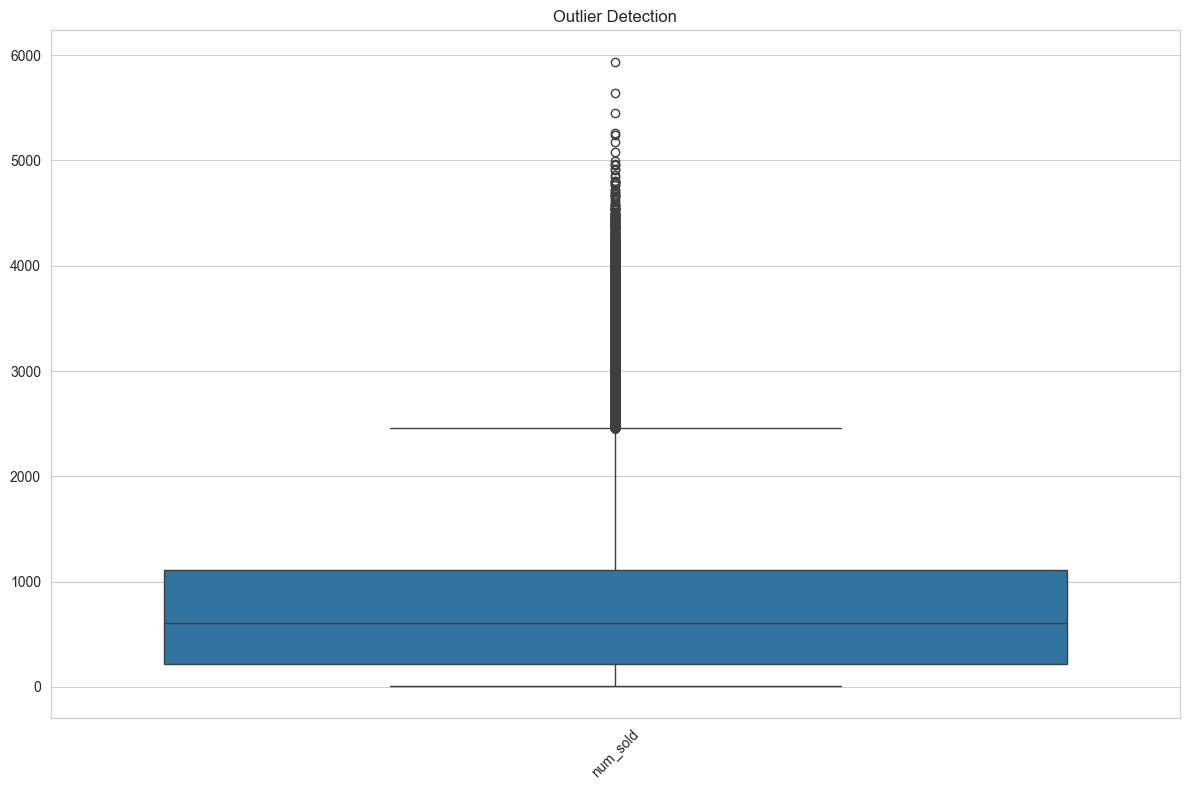

In [172]:
plot_multiple_boxplots(stickers_with_days)

In [173]:
def remove_outliers_iqr(data):
    # Select only numeric columns
    numeric_columns = data.select_dtypes(include=['float64']).columns
    
    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned = data.copy()
    
    for col in numeric_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove rows with values outside the bounds
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    return df_cleaned

In [174]:
clean_stickers = remove_outliers_iqr(stickers_with_days)

In [175]:
print(f'{stickers.shape[0]-clean_stickers.shape[0]} rows deleted')

15501 rows deleted


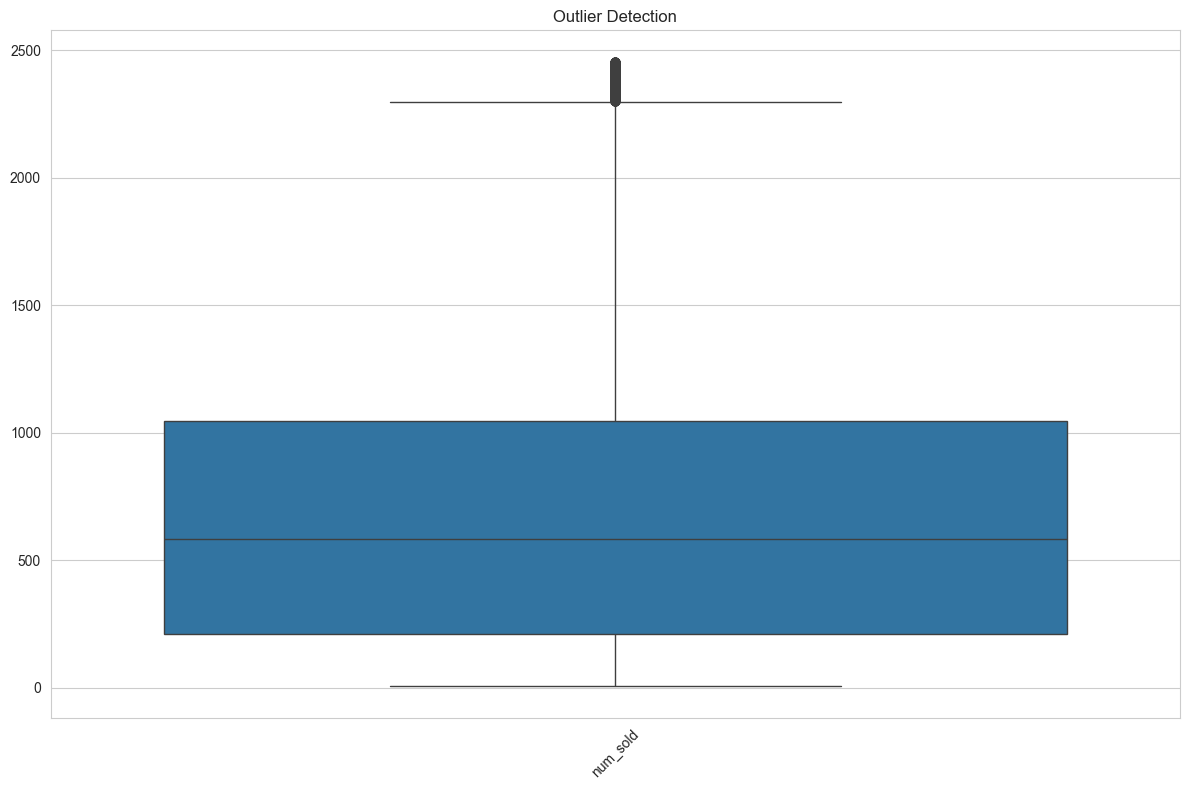

In [176]:
plot_multiple_boxplots(clean_stickers)

In [177]:
clean_stickers.describe().T

,count,mean,std,min,25%,50%,75%,max
num_sold,214629.0,682.394751,566.294552,5.0,212.0,582.0,1047.0,2456.0
day,214629.0,15.724716,8.797505,1.0,8.0,16.0,23.0,31.0
month,214629.0,6.526951,3.460345,1.0,4.0,7.0,10.0,12.0
year,214629.0,2013.025877,2.004991,2010.0,2011.0,2013.0,2015.0,2016.0
weekday,214629.0,2.999781,1.999036,0.0,1.0,3.0,5.0,6.0
is_weekend,214629.0,0.142874,0.349946,0.0,0.0,0.0,0.0,1.0


# Add GDP Per Capita for Each Country by Year

In [178]:
import requests
import pycountry

# This function return the abbreviation of a country 
def get_country_abbreviation(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        return country.alpha_2
    except AttributeError:
        return "Country not found"

In [179]:
def get_gdp_per_capita_to_df(df):
    data = df.copy()
    # get years and countries exist within the data
    years = data['year'].unique().tolist()
    countries = data['country'].unique().tolist()
    
    # fill the dic with the correspondent abbreviation for a country
    country_abv = {}
    for country in countries:
        country_abv[country] = get_country_abbreviation(country)
    
    # get the GDP for each country by year
    gdp_per_capita = {}
    for abv in country_abv:
        gdp_per_capita[abv] = {}
        
        for year in years:
            url = f'https://api.worldbank.org/v2/country/{country_abv[abv]}/indicator/NY.GDP.PCAP.CD?date={year}&format=json'
            resp = requests.get(url)
            
            if resp.status_code == 200:
                gdp_info = resp.json()
                gdp_year = gdp_info[1][0]['value']
                gdp_per_capita[abv][year] = round(gdp_year,2)
            else:
                print(f'error {resp.status_code}')
    
    # add GDP column to the data
    data['GDP'] = data.apply(lambda row: gdp_per_capita[row['country']][row['year']], axis=1)
    return data

In [180]:
stickers_with_gdp = get_gdp_per_capita_to_df(clean_stickers)

In [181]:
stickers_with_gdp.head()

,country,store,product,num_sold,day,month,year,weekday,is_weekend,GDP
0,Canada,Discount Stickers,Kaggle,973.0,1,1,2010,4,0,47560.67
1,Canada,Discount Stickers,Kaggle Tiers,906.0,1,1,2010,4,0,47560.67
2,Canada,Discount Stickers,Kerneler,423.0,1,1,2010,4,0,47560.67
3,Canada,Discount Stickers,Kerneler Dark Mode,491.0,1,1,2010,4,0,47560.67
4,Canada,Stickers for Less,Holographic Goose,300.0,1,1,2010,4,0,47560.67


In [182]:
stickers_with_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214629 entries, 0 to 221258
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   country     214629 non-null  object 
 1   store       214629 non-null  object 
 2   product     214629 non-null  object 
 3   num_sold    214629 non-null  float64
 4   day         214629 non-null  int32  
 5   month       214629 non-null  int32  
 6   year        214629 non-null  int32  
 7   weekday     214629 non-null  int32  
 8   is_weekend  214629 non-null  int64  
 9   GDP         214629 non-null  float64
dtypes: float64(2), int32(4), int64(1), object(3)
memory usage: 14.7+ MB


In [183]:
stickers_with_gdp.groupby('country').agg({'GDP': 'mean', 'num_sold': 'mean'}).sort_values(by=['GDP','num_sold'], ascending=True).reset_index()

,country,GDP,num_sold
0,Kenya,1346.794673,20.431100
1,Italy,34753.594767,542.241403
2,Finland,47268.635755,747.713149
3,Canada,48948.603441,839.497302
4,Singapore,54820.052555,859.145735
5,Norway,90114.349991,1093.221461


# Country Encoding

In [184]:
def country_label_encoded(data):
    country_list = data.groupby('country').agg({'GDP': 'mean', 'num_sold': 'mean'}).sort_values(by=['GDP','num_sold'], ascending=True).reset_index()['country'].tolist()
    country_mapping = {country: idx for idx, country in enumerate(country_list)}
    stickers_with_gdp['country'] = stickers_with_gdp['country'].map(country_mapping)
    return country_mapping

In [185]:
country_order = country_label_encoded(stickers_with_gdp)

In [186]:
country_order

{'Kenya': 0,
 'Italy': 1,
 'Finland': 2,
 'Canada': 3,
 'Singapore': 4,
 'Norway': 5}

In [187]:
stickers_with_gdp.head()

,country,store,product,num_sold,day,month,year,weekday,is_weekend,GDP
0,3,Discount Stickers,Kaggle,973.0,1,1,2010,4,0,47560.67
1,3,Discount Stickers,Kaggle Tiers,906.0,1,1,2010,4,0,47560.67
2,3,Discount Stickers,Kerneler,423.0,1,1,2010,4,0,47560.67
3,3,Discount Stickers,Kerneler Dark Mode,491.0,1,1,2010,4,0,47560.67
4,3,Stickers for Less,Holographic Goose,300.0,1,1,2010,4,0,47560.67


# Object Type 

In [188]:
obj_col = stickers_with_gdp.select_dtypes(include='object').columns
print(obj_col)

Index(['store', 'product'], dtype='object')


In [189]:
print(stickers_with_gdp['store'].unique())
print(stickers_with_gdp['product'].unique())

['Discount Stickers' 'Stickers for Less' 'Premium Sticker Mart']
['Kaggle' 'Kaggle Tiers' 'Kerneler' 'Kerneler Dark Mode'
 'Holographic Goose']


# One Hot Encoding

In [190]:
X = stickers_with_gdp.drop('num_sold', axis=1)
y = stickers_with_gdp['num_sold']

In [191]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse_output=False, drop='if_binary'), obj_col)
    ], remainder='passthrough', verbose_feature_names_out=False
).set_output(transform="pandas")

transformed_X_stickers = transformer.fit_transform(X)

In [192]:
transformed_X_stickers.head()

,store_Discount Stickers,store_Premium Sticker Mart,store_Stickers for Less,product_Holographic Goose,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode,country,day,month,year,weekday,is_weekend,GDP
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,1,1,2010,4,0,47560.67
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,1,1,2010,4,0,47560.67
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,1,2010,4,0,47560.67
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1,1,2010,4,0,47560.67
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3,1,1,2010,4,0,47560.67


# Model Training

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)

In [194]:
col_to_delete = ['store_Discount Stickers','product_Holographic Goose']
transformed_X_stickers.drop(col_to_delete, axis=1, inplace=True)

In [195]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X_stickers, y, test_size=0.05, random_state=42)

In [196]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [197]:
rf_regressor.oob_score_

0.9900318900310058

In [198]:
rf_regressor.score(transformed_X_stickers, y)

0.9981854787239259

In [199]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

rmse = mean_squared_error(y_test, rf_regressor.predict(X_test))
rmsep = mean_absolute_percentage_error(y_test, rf_regressor.predict(X_test)) 

In [200]:
rmse, rmsep

(3271.8948135575847, 0.050480933901925)

# Prediction for Test Dataset

In [201]:
test_df = pd.read_csv('data/test.csv')  

In [202]:
test_df_date_decomposition = get_day_month_year(test_df.drop('id',axis=1))
test_df_date_decomposition.head()

,country,store,product,day,month,year,weekday,is_weekend
0,Canada,Discount Stickers,Holographic Goose,1,1,2017,6,0
1,Canada,Discount Stickers,Kaggle,1,1,2017,6,0
2,Canada,Discount Stickers,Kaggle Tiers,1,1,2017,6,0
3,Canada,Discount Stickers,Kerneler,1,1,2017,6,0
4,Canada,Discount Stickers,Kerneler Dark Mode,1,1,2017,6,0


In [203]:
test_df_gdp = get_gdp_per_capita_to_df(test_df_date_decomposition)

In [205]:
test_df_gdp['country'] = test_df_gdp['country'].map(country_order)

In [206]:
test_df_gdp.head()

,country,store,product,day,month,year,weekday,is_weekend,GDP
0,3,Discount Stickers,Holographic Goose,1,1,2017,6,0,45129.63
1,3,Discount Stickers,Kaggle,1,1,2017,6,0,45129.63
2,3,Discount Stickers,Kaggle Tiers,1,1,2017,6,0,45129.63
3,3,Discount Stickers,Kerneler,1,1,2017,6,0,45129.63
4,3,Discount Stickers,Kerneler Dark Mode,1,1,2017,6,0,45129.63


In [207]:
transformed_test_df = transformer.transform(test_df_gdp) 
transformed_test_df.drop(col_to_delete, axis=1, inplace=True)

In [208]:
transformed_test_df.head()

,store_Premium Sticker Mart,store_Stickers for Less,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode,country,day,month,year,weekday,is_weekend,GDP
0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,1,2017,6,0,45129.63
1,0.0,0.0,1.0,0.0,0.0,0.0,3,1,1,2017,6,0,45129.63
2,0.0,0.0,0.0,1.0,0.0,0.0,3,1,1,2017,6,0,45129.63
3,0.0,0.0,0.0,0.0,1.0,0.0,3,1,1,2017,6,0,45129.63
4,0.0,0.0,0.0,0.0,0.0,1.0,3,1,1,2017,6,0,45129.63


In [209]:
pred = rf_regressor.predict(transformed_test_df)

In [ ]:
sub = pd.read_csv('data/sample_submission.csv')
sub['num_sold'] = pred
sub.to_csv('submission.csv', index=False)